# PspNet Semantic Segmentation

General Workflow:
1. Load Google street view images
2. Segmentation
3. Save results to a csv

### 1. Import the Color Pallete for different street features

In [2]:
### 1.Import Color Pallete
# import tensorflow 
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

In [3]:
### 1.Import Color Pallete
# import tensorflow 
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

### 2. Generate the downloaded jpg list

In [10]:
### 2.Generate jpg list
from os import listdir
from mxnet import image
from os.path import isfile, join
import pandas as pd

path="Sample_Points/"
path_out="pspnet/PspNet/"
path_out_lgd="pspnet/PspNetLgd/"
df_pspnet=pd.DataFrame()
print("Photo path is: %s"%(path))
all_files = [f for f in listdir(path)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()
print(jpg_files) 
print("1.Image Files in the folder:",len(jpg_files))


Photo path is: Sample_Points/
['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
1.Image Files in the folder: 13


### 2.1 Test whether the images can be called and what are there format

In [11]:
### 2.1 Get image
for filename in jpg_files[0:10]:
    print((filename.split('.')[0]))
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    print(filename,'image shape:',img.shape)

1
1.jpg image shape: (400, 640, 3)
10
10.jpg image shape: (400, 640, 3)
11
11.jpg image shape: (400, 640, 3)
12
12.jpg image shape: (400, 640, 3)
13
13.jpg image shape: (400, 640, 3)
2
2.jpg image shape: (400, 640, 3)
3
3.jpg image shape: (400, 640, 3)
4
4.jpg image shape: (400, 640, 3)
5
5.jpg image shape: (400, 640, 3)
6
6.jpg image shape: (400, 640, 3)


In [12]:
file = ['0','1','2','3','4','5']
for x in file[:3]:
    print(x)

0
1
2



### 3.Apply PSPNET to images and generate a csv

In [13]:
### 3.Apply PSPNET to images and generate a csv
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches 
from matplotlib.font_manager import FontProperties
import numpy as np
import collections
from gluoncv.utils.viz import get_color_pallete

keywords=['mountain','water','lake','sky','bridge','pier',
          'ceiling','building','skyscraper','wall','fence','windowpane','glass',
          'tree','grass','plant','road','sidewalk','earth',
          'person','minibike','bicycle','car','van',
          'sofa','chair','booth','fountain','railing','signboard','column','awning','desk','lamp',
          'streetlight','sculpture','ashcan','bulletin board']


In [14]:
### 0.Using cpu
ctx = mx.cpu(0)
# Get pre-trained model | PSPNET Cityscape
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)
# Set up legend font
fontP = FontProperties()
fontP.set_size('x-small') 

self.crop_size 480


In [15]:
ID=0
number = len(jpg_files)
for filename in jpg_files:
    
    # ************* Start Timer***
    t1 = time.time()
    
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    #print(path+filename,img.shape)
    size=img.shape[0]*img.shape[1]
#     # Display origin image
#     plt.imshow(img.asnumpy())
#     plt.show()    
    ### 2.Normalize the image using dataset mean
    transform_fn = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225])])
    img = transform_fn(img)
    img = img.expand_dims(0).as_in_context(ctx)
    ### 3. Apply pre-trained model to the loaded image
    output = model.demo(img)
    ### 4.Make prediction using single scale
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    ### 5.Add color pallete for visualization
    mask = get_color_pallete(predict, 'ade20k')
    # 5.1 Save predict outcome
    fileID=(filename.split('.')[0]).split('_')[0]
    print('***Read file:%s, with FileID:%s'%(filename,fileID))
    mask.save(path_out+fileID+'.png')
    
    #print("runtime:",datetime.now()-startTime) # stop timer
    # 5.2 Show the predicted mask | PSPNET
#     mmask = mpimg.imread(path_out+fileID+'.png')
    plt.imshow(mask)
#     plt.show()    
    ### 6. Result Analysis and add legends ***************************
    # 0:Label, 1:Label ID and 2: Label Color
    unique, counts = np.unique(predict, return_counts=True)
    ratio_dict=dict(zip(unique, counts))
    labelratio_dict={}
    legend_dict={}
    ### Get Ratio
    for key in ratio_dict.keys():
        #Rescale RGB to (0,1)
        #np.interp(ade20k_id2label[key][2], (0, 255), (0, 1))
        legend_dict[ade20k_id2label[key][0]]=np.round(np.interp(ade20k_id2label[key][2], (0, 255), (0, 1)),6)
        labelratio_dict[ade20k_id2label[key][0]]=round(ratio_dict[key]/size,6)
    #print('1.Index Ratio:',ratio_dict,'\n2.Label Color:',legend_dict)
    ### 7. Show the predicted mask | PSPNET with Legend Label
    # 7.1.Show mmask image
    #mmask = mpimg.imread(path_out+fileID+'.png')
    # Display masked image
    #plt.imshow(mmask)
    # 7.2.Add Legend
    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)
    plt.legend(handles=patchList,loc='best',fontsize='x-small',prop=fontP,labelspacing=0.2)
    plt.savefig(path_out_lgd+fileID+'.png', bbox_inches='tight')
    plt.close()
    # Display masked image with legend
    #plt.show()
    #print (labelratio_dict)        
    df_pspnet.loc[ID,'FID']=fileID
    for key in labelratio_dict.keys():
        if key in keywords:
            df_pspnet.loc[ID,key]=labelratio_dict[key]    
    ID+=1
    
    # *************Stop Timer***
    t2 = time.time()
    print('runtime',t2-t1)
    df_pspnet.to_csv('pspnet/pspnet_result.csv', index=False, encoding='utf-8')


# Save the segmentation result to a csv in the folder
df_pspnet.to_csv('pspnet/pspnet_result.csv', index=False, encoding='utf-8')
print("All Done")
df_pspnet.head(number - 1)

***Read file:1.jpg, with FileID:1
runtime 15.473042964935303
***Read file:10.jpg, with FileID:10
runtime 15.060698747634888
***Read file:11.jpg, with FileID:11
runtime 14.519547939300537
***Read file:12.jpg, with FileID:12
runtime 14.518635034561157
***Read file:13.jpg, with FileID:13
runtime 14.431435108184814
***Read file:2.jpg, with FileID:2
runtime 14.847146987915039
***Read file:3.jpg, with FileID:3
runtime 14.577862024307251
***Read file:4.jpg, with FileID:4
runtime 14.622241020202637
***Read file:5.jpg, with FileID:5
runtime 14.529606103897095
***Read file:6.jpg, with FileID:6
runtime 14.893779993057251
***Read file:7.jpg, with FileID:7
runtime 14.509173154830933
***Read file:8.jpg, with FileID:8
runtime 14.444369077682495
***Read file:9.jpg, with FileID:9
runtime 14.49089527130127
All Done


,FID,wall,building,sky,tree,road,sidewalk,person,car,fence,signboard,awning,streetlight,minibike,van,bicycle,ashcan,plant
0,1,0.039617,0.345770,0.192441,0.008504,0.236805,0.018648,0.001500,0.137117,0.011973,0.002203,0.001223,0.000461,NaN,NaN,NaN,NaN,NaN
1,10,NaN,0.398734,0.119980,0.018223,0.375680,0.023875,NaN,0.036895,NaN,0.000141,0.007762,NaN,NaN,NaN,NaN,NaN,NaN
2,11,NaN,0.422098,0.110590,0.012523,0.367320,0.009273,0.000137,0.048637,NaN,NaN,NaN,NaN,0.008770,NaN,NaN,NaN,NaN
3,12,NaN,0.384438,0.115465,0.040137,0.309422,0.009797,0.002391,0.132852,NaN,0.002617,0.000785,NaN,NaN,NaN,NaN,NaN,NaN
4,13,NaN,0.390223,0.116727,0.035168,0.250039,0.009871,0.002711,0.175340,NaN,NaN,0.003902,NaN,NaN,0.015672,NaN,NaN,NaN
5,2,NaN,0.343520,0.184219,0.013621,0.356312,0.019691,0.001383,0.049578,0.024832,NaN,0.006844,NaN,NaN,NaN,NaN,NaN,NaN
6,3,0.021848,0.292676,0.189676,0.051004,0.352383,0.040684,0.001871,0.025438,0.018945,NaN,NaN,NaN,NaN,0.005477,NaN,NaN,NaN
7,4,NaN,0.317711,0.180102,0.025066,0.329797,0.012227,NaN,0.081691,0.025219,0.000852,0.020543,NaN,NaN,0.006793,NaN,NaN,NaN
8,5,0.000629,0.353941,0.180969,0.012859,0.360266,0.032625,0.002832,0.027855,0.024438,NaN,0.001504,NaN,NaN,0.000453,NaN,NaN,NaN
9,6,0.000105,0.419910,0.123008,0.003652,0.326855,0.031246,0.000914,0.046703,0.022500,0.001340,0.017359,0.000461,0.000961,NaN,0.001715,NaN,NaN


# 4. Read the csv result

Notice that there are many NaN, which means that no data, we will replace these NaN with 0

#### 4.1 Read the csv result

In [16]:
# 4.1 Read the csv result
df_psp=pd.read_csv('pspnet/pspnet_result.csv', encoding='utf-8', engine='python')
df_psp.head(3)

,FID,wall,building,sky,tree,road,sidewalk,person,car,fence,signboard,awning,streetlight,minibike,van,bicycle,ashcan,plant
0,1,0.039617,0.345770,0.192441,0.008504,0.236805,0.018648,0.001500,0.137117,0.011973,0.002203,0.001223,0.000461,NaN,NaN,NaN,NaN,NaN
1,10,NaN,0.398734,0.119980,0.018223,0.375680,0.023875,NaN,0.036895,NaN,0.000141,0.007762,NaN,NaN,NaN,NaN,NaN,NaN
2,11,NaN,0.422098,0.110590,0.012523,0.367320,0.009273,0.000137,0.048637,NaN,NaN,NaN,NaN,0.00877,NaN,NaN,NaN,NaN


In [17]:
# 4.2 Replace the NaN with 0 using fillna(0), and save the result to a new csv file
df_psp=df_psp.fillna(0)

# save the result to a new csv file
df_psp.to_csv('pspnet/pspnet_final.csv', index=False, encoding='utf-8')

df_psp.head(3)

,FID,wall,building,sky,tree,road,sidewalk,person,car,fence,signboard,awning,streetlight,minibike,van,bicycle,ashcan,plant
0,1,0.039617,0.345770,0.192441,0.008504,0.236805,0.018648,0.001500,0.137117,0.011973,0.002203,0.001223,0.000461,0.00000,0.0,0.0,0.0,0.0
1,10,0.000000,0.398734,0.119980,0.018223,0.375680,0.023875,0.000000,0.036895,0.000000,0.000141,0.007762,0.000000,0.00000,0.0,0.0,0.0,0.0
2,11,0.000000,0.422098,0.110590,0.012523,0.367320,0.009273,0.000137,0.048637,0.000000,0.000000,0.000000,0.000000,0.00877,0.0,0.0,0.0,0.0


# 5. Visualization

Notice that there are many NaN, which means that no data, we will replace these NaN with 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 5.1 Read the csv result

In [184]:
# 4.1 Read the csv result
df_psp=pd.read_csv('pspnet/pspnet_final.csv', encoding='utf-8', engine='python')
df_psp = df_psp.sort_values(by='FID')
df = df_psp
df = df.reset_index(drop = True)
list_num = df.shape[1]
row_num = df.shape[0]
col = list(df.columns)
row = list(df.index)
print('The total row is',row_num,'The total list is',list_num)
print('col is',col, ',row is',row)
df.head(3)

The total row is 597 The total list is 29
col is ['FID', 'wall', 'building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'plant', 'car', 'fence', 'signboard', 'minibike', 'grass', 'earth', 'streetlight', 'van', 'ashcan', 'railing', 'fountain', 'column', 'bicycle', 'awning', 'mountain', 'water', 'bridge', 'skyscraper', 'chair', 'ceiling'] ,row is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 

,FID,wall,building,sky,tree,road,sidewalk,person,plant,car,...,fountain,column,bicycle,awning,mountain,water,bridge,skyscraper,chair,ceiling
0,1,0.006832,0.441113,0.070480,0.042574,0.308508,0.048512,0.023293,0.010934,0.034305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000113,0.350605,0.069145,0.052035,0.324512,0.047559,0.000000,0.000000,0.071406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.000000,0.335336,0.106020,0.068867,0.185367,0.000070,0.044828,0.000000,0.145477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.2 Read the csv row and list

#### 5.3 Set xticks

Text(0.5, 1.0, 'Scores by group and gender')

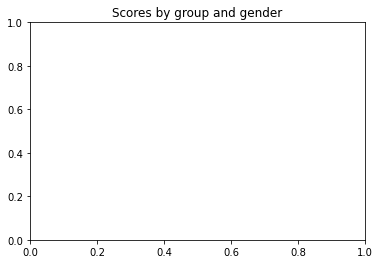

In [185]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Scores by group and gender')

In [186]:
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

In [195]:
col[0]


'FID'

In [203]:
fields = []
colors = []
for i in range(len(col)):
    fields.append(col[i])
fields.pop(0)
count = 0

for i in range(len(fields)):
    for j in range(len(labels_ade)):
        if fields[i] == labels_ade[j][0]:
            colors.append(labels_ade[j][2])
            count = count + 1
print("total copy", count ,'color')
colors
fields


total copy 28 color


['wall',
 'building',
 'sky',
 'tree',
 'road',
 'sidewalk',
 'person',
 'plant',
 'car',
 'fence',
 'signboard',
 'minibike',
 'grass',
 'earth',
 'streetlight',
 'van',
 'ashcan',
 'railing',
 'fountain',
 'column',
 'bicycle',
 'awning',
 'mountain',
 'water',
 'bridge',
 'skyscraper',
 'chair',
 'ceiling']

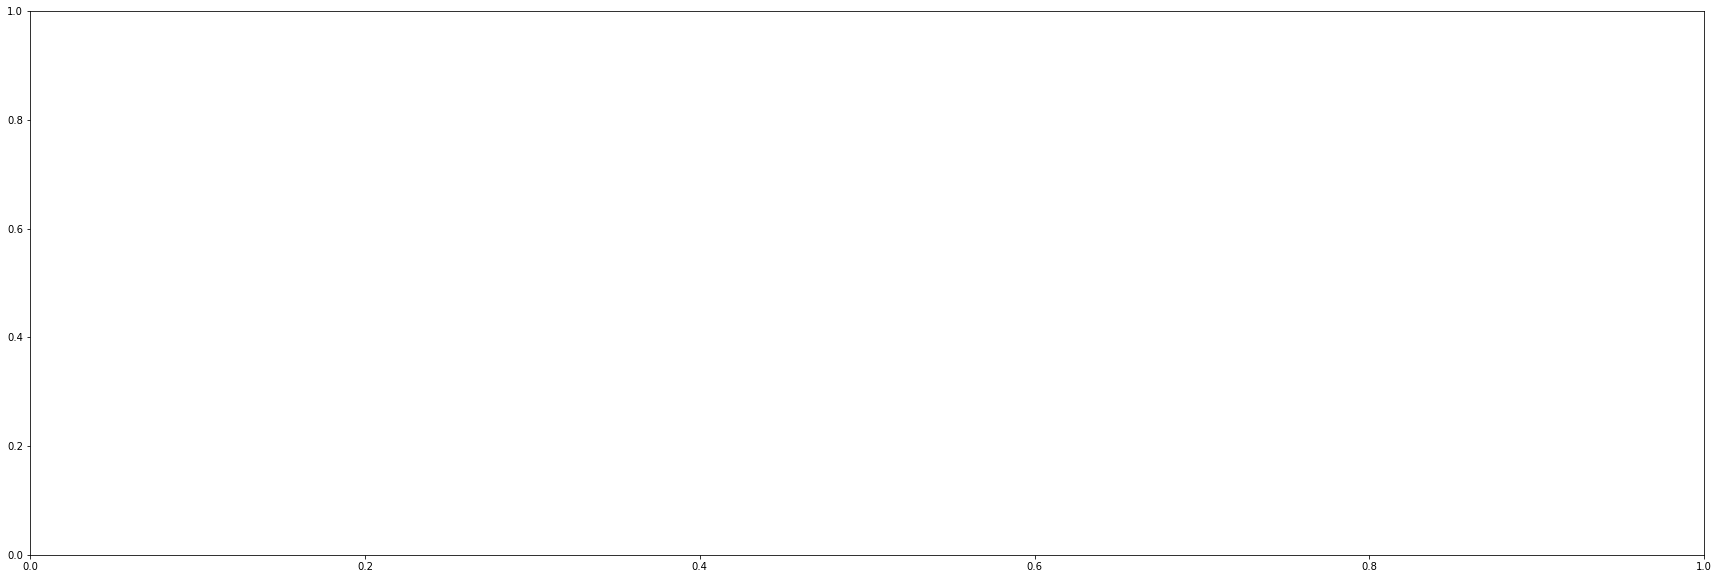

In [211]:
#图形和轴
fig, ax = plt.subplots(1, figsize=(30, 10))
# 绘图


In [209]:
len(df)

597